In [3]:
from google.colab import files
uploaded = files.upload()


Saving 2) Stock Prices Data Set.csv to 2) Stock Prices Data Set.csv


In [7]:
import pandas as pd
import os

for file in os.listdir():
    print(file)


.config
2) Stock Prices Data Set.csv
sample_data


In [9]:
df = pd.read_csv("2) Stock Prices Data Set.csv")
df.head()


,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [10]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [11]:
df.isnull().sum()


,0
symbol,0
date,0
open,11
high,8
low,8
close,0
volume,0


In [12]:
df.describe()


,open,high,low,close,volume
count,497461.000000,497464.000000,497464.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.471228,102.312062,100.570957,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [13]:
df['symbol'].nunique(), df['symbol'].unique()


(505,
 array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
        'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
        'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
        'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
        'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
        'APD', 'APH', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK',
        'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY', 'BDX',
        'BEN', 'BF.B', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BRK.B', 'BSX',
        'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA', 'CBG', 'CBOE', 'CBS',
        'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CF', 'CHD', 'CHK',
        'CHRW', 'CHTR', 'CINF', 'CI', 'CLX', 'CL', 'CMA', 'CMCSA', 'CME',
        'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL', 'COO',
        'COP', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL',
        'CTSH', 'CTXS', 'CVS', 'CVX', '

In [14]:
df.dropna(inplace=True)
print("Shape after dropping missing values:", df.shape)


Shape after dropping missing values: (497461, 7)


In [15]:
df['date'] = pd.to_datetime(df['date'])


In [16]:
df.sort_values(by=['symbol', 'date'], inplace=True)


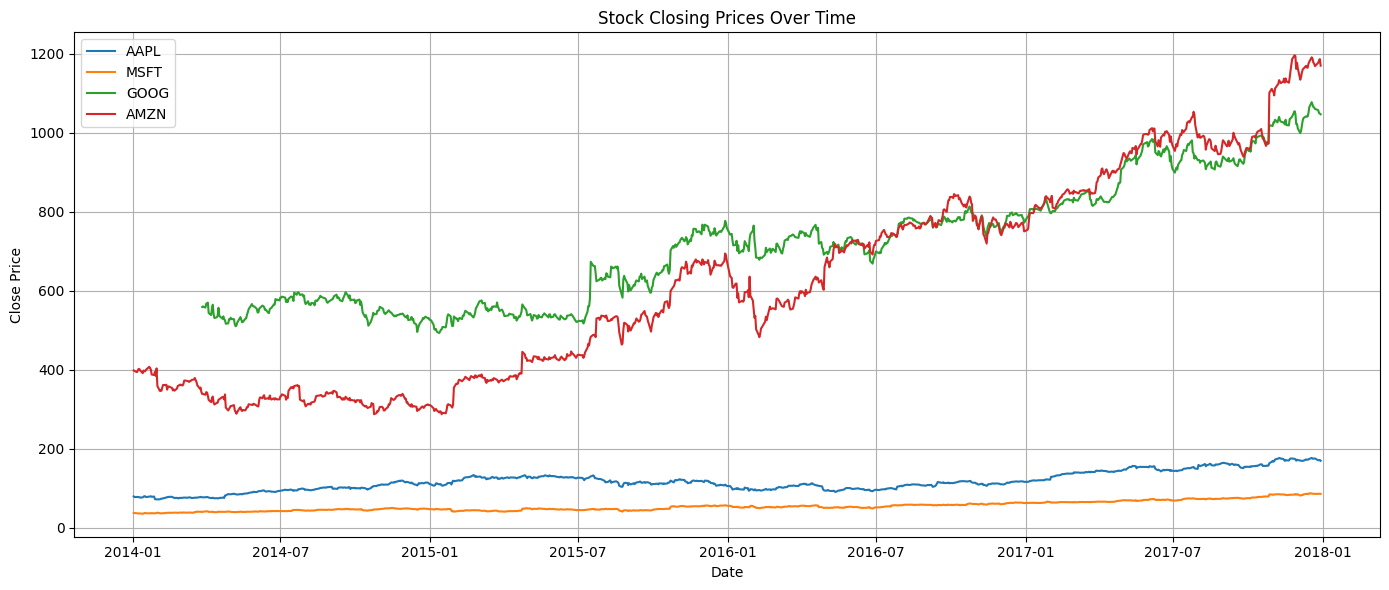

In [17]:
import matplotlib.pyplot as plt

# Let's pick a few popular companies
companies = ['AAPL', 'MSFT', 'GOOG', 'AMZN']

plt.figure(figsize=(14, 6))

for company in companies:
    subset = df[df['symbol'] == company]
    plt.plot(subset['date'], subset['close'], label=company)

plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



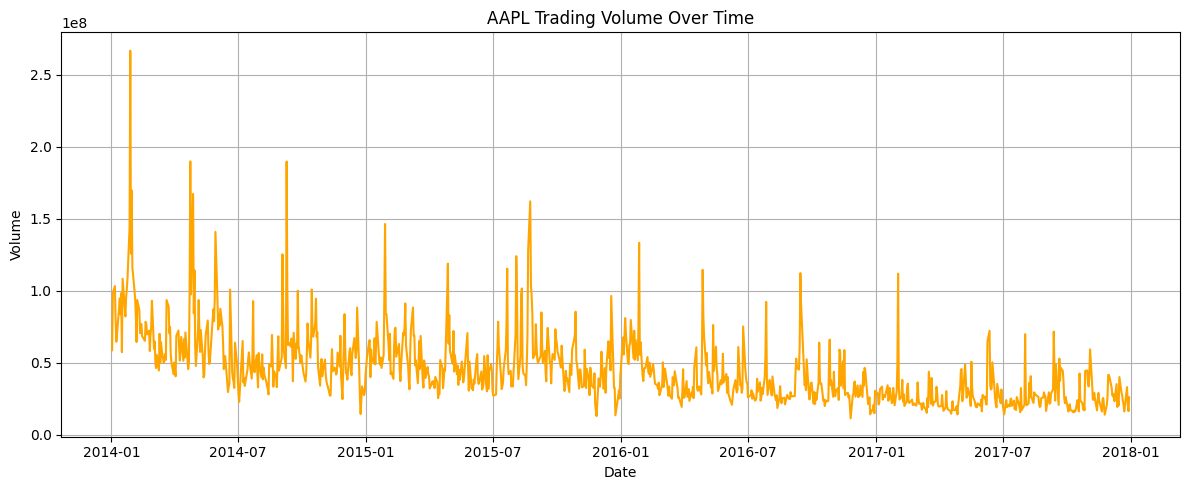

In [18]:
apple = df[df['symbol'] == 'AAPL']

plt.figure(figsize=(12, 5))
plt.plot(apple['date'], apple['volume'], color='orange')
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-19-3246356810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['MA30'] = apple['close'].rolling(window=30).mean()


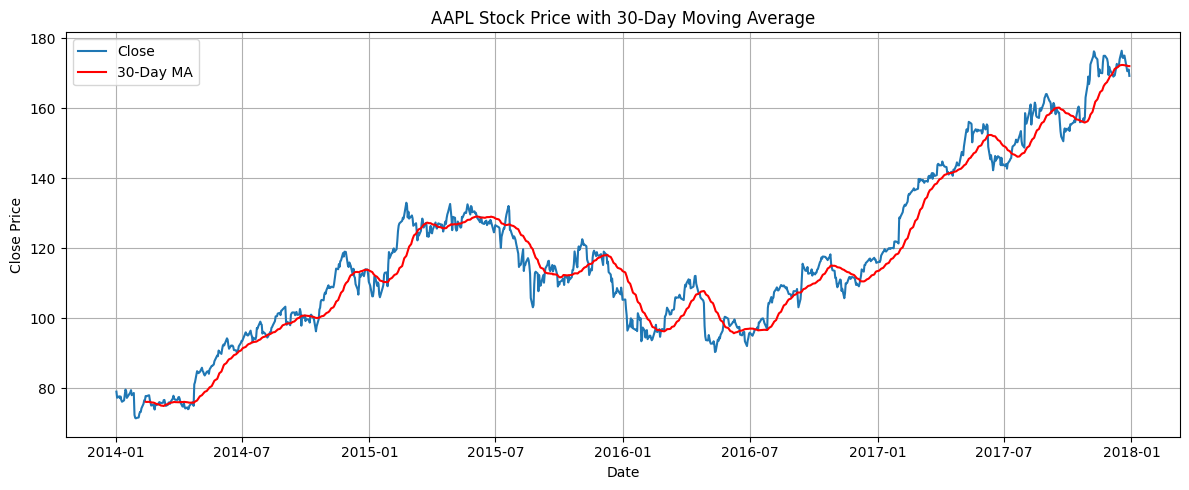

In [19]:
# 30-day moving average for Apple
apple['MA30'] = apple['close'].rolling(window=30).mean()

plt.figure(figsize=(12, 5))
plt.plot(apple['date'], apple['close'], label='Close')
plt.plot(apple['date'], apple['MA30'], label='30-Day MA', color='red')
plt.title('AAPL Stock Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# We'll forecast 30 days into the future
forecast_days = 30

# Create new column with future close price shifted up
apple['Prediction'] = apple['close'].shift(-forecast_days)

# Features (X) and labels (y)
X = apple[['close']][:-forecast_days]
y = apple['Prediction'][:-forecast_days]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
apple = df[df['symbol'] == 'AAPL'].copy()
apple['date'] = pd.to_datetime(apple['date'])  # Also safe if not yet done
apple.set_index('date', inplace=True)

# Now add prediction column
forecast_days = 30
apple['Prediction'] = apple['close'].shift(-forecast_days)


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

# Test prediction
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



R² Score: 0.8577587015754776
RMSE: 8.930492914272225


In [26]:
# Get last 30 days (features)
forecast = apple[['close']].tail(forecast_days)

# Predict next 30 days
forecast_prediction = model.predict(forecast)

# Show predicted values
forecast_prediction


array([172.48309103, 171.55603971, 171.39014632, 174.47381175,
       176.2498469 , 176.25960533, 175.40086306, 174.4055027 ,
       170.90222457, 173.21497364, 172.43429885, 171.21449449,
       171.05835953, 170.44357813, 170.74608961, 170.79488179,
       174.01516531, 173.06859712, 173.62482791, 173.57603574,
       175.28376184, 177.67457839, 175.83999263, 175.65458237,
       176.29863907, 176.29863907, 171.96589398, 171.99516928,
       172.46357416, 170.6582637 ])

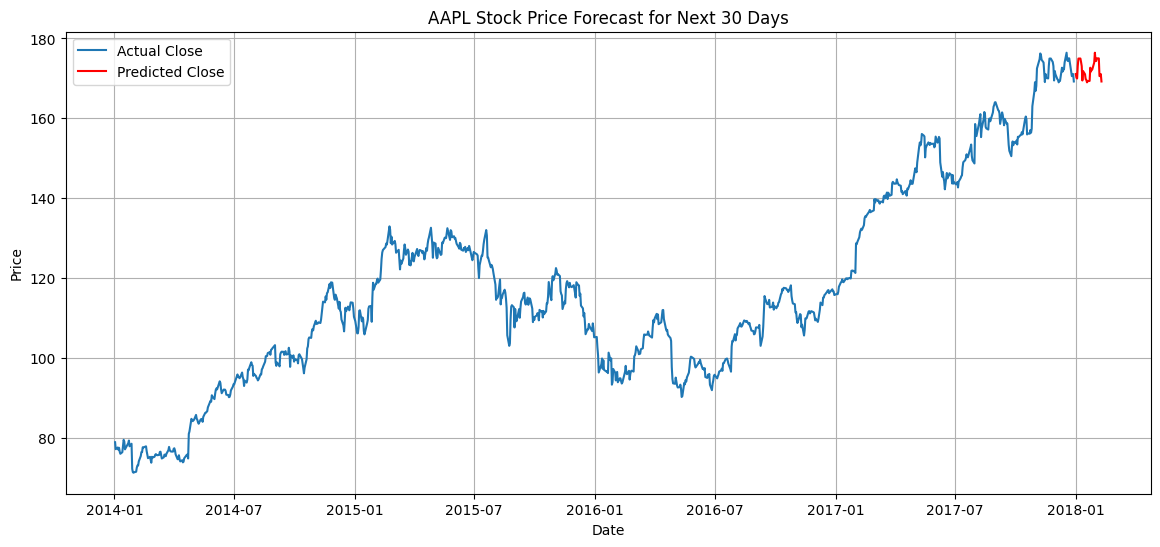

In [33]:
# If forecast is a DataFrame without column names, get first column
try:
    forecast_flat = forecast['Prediction'].values.ravel()
except KeyError:
    forecast_flat = forecast.iloc[:, 0].values.ravel()  # fallback if no column name

# Continue as before
forecast_df = pd.DataFrame({
    'Predicted Close': forecast_flat,
    'Date': forecast_dates
})
forecast_df.set_index('Date', inplace=True)

# Plot
plt.figure(figsize=(14,6))
plt.plot(apple['close'], label='Actual Close')
plt.plot(forecast_df['Predicted Close'], label='Predicted Close', color='red')
plt.title('AAPL Stock Price Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
